In [1]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


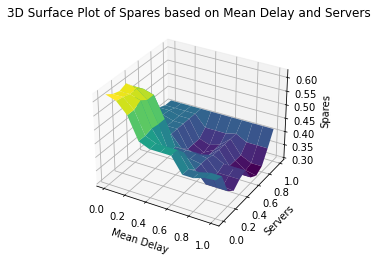


Case 1:
Enter mean delay (0 to 1): 0.2
Enter number of servers (0 to 1): 0.1
Enter utilisation factor (0 to 1): 0.1
Recommended Spares: 0.48

Case 2:
Enter mean delay (0 to 1): 0.6
Enter number of servers (0 to 1): 0.8
Enter utilisation factor (0 to 1): 0.7
Recommended Spares: 0.44

Case 3:
Enter mean delay (0 to 1): 0.3
Enter number of servers (0 to 1): 0.5
Enter utilisation factor (0 to 1): 0.9
Recommended Spares: 0.64


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Specify the problem and define linguistic variables
def define_variables():
    mean_delay = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'mean_delay')
    servers = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'servers')
    utilisation_factor = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'utilisation_factor')
    spares = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'spares')

    mean_delay['Very Short'] = fuzz.trimf(mean_delay.universe, [0, 0, 0.3])
    mean_delay['Short'] = fuzz.trimf(mean_delay.universe, [0.1, 0.3, 0.5])
    mean_delay['Medium'] = fuzz.trimf(mean_delay.universe, [0.4, 0.7, 1])

    servers['Small'] = fuzz.trimf(servers.universe, [0, 0, 0.35])
    servers['Medium'] = fuzz.trimf(servers.universe, [0.3, 0.5, 0.7])
    servers['Large'] = fuzz.trimf(servers.universe, [0.6, 1, 1])

    utilisation_factor['Low'] = fuzz.trimf(utilisation_factor.universe, [0, 0, 0.6])
    utilisation_factor['Medium'] = fuzz.trimf(utilisation_factor.universe, [0.4, 0.6, 0.8])
    utilisation_factor['High'] = fuzz.trimf(utilisation_factor.universe, [0.6, 1, 1])

    spares['Very Small'] = fuzz.trimf(spares.universe, [0, 0, 0.3])
    spares['Small'] = fuzz.trimf(spares.universe, [0, 0.2, 0.4])
    spares['Rather Small'] = fuzz.trimf(spares.universe, [0.25, 0.35, 0.45])
    spares['Medium'] = fuzz.trimf(spares.universe, [0.3, 0.5, 0.7])
    spares['Rather Large'] = fuzz.trimf(spares.universe, [0.55, 0.65, 0.75])
    spares['Large'] = fuzz.trimf(spares.universe, [0.6, 0.8, 1])
    spares['Very Large'] = fuzz.trimf(spares.universe, [0.7, 1, 1])

    return mean_delay, servers, utilisation_factor, spares

# Step 2 & 3: Construct fuzzy rules
def construct_rules(mean_delay, servers, utilisation_factor, spares):
    rule1 = ctrl.Rule(utilisation_factor['Low'], spares['Small'])
    rule2 = ctrl.Rule(utilisation_factor['Medium'], spares['Medium'])
    rule3 = ctrl.Rule(utilisation_factor['High'], spares['Large'])

    rule4 = ctrl.Rule(mean_delay['Very Short'] & servers['Small'], spares['Very Large'])
    rule5 = ctrl.Rule(mean_delay['Short'] & servers['Small'], spares['Large'])
    rule6 = ctrl.Rule(mean_delay['Medium'] & servers['Small'], spares['Medium'])

    rule7 = ctrl.Rule(mean_delay['Very Short'] & servers['Medium'], spares['Rather Large'])
    rule8 = ctrl.Rule(mean_delay['Short'] & servers['Medium'], spares['Rather Small'])
    rule9 = ctrl.Rule(mean_delay['Medium'] & servers['Medium'], spares['Small'])

    rule10= ctrl.Rule(mean_delay['Very Short'] & servers['Large'], spares['Medium'])
    rule11= ctrl.Rule(mean_delay['Short'] & servers['Large'], spares['Small'])
    rule12= ctrl.Rule(mean_delay['Medium'] & servers['Large'], spares['Very Small'])

    return [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12]

# Step 4: Encode fuzzy sets and rules into the expert system
def create_fuzzy_system(rules):
    spares_ctrl= ctrl.ControlSystem(rules)
    spares_sim= ctrl.ControlSystemSimulation(spares_ctrl)
    return spares_sim

# Function to create the 3D figure for Rule Base 1
def create_3d_figure(fuzzy_system):
    var1_values= np.arange(0, 1.1, 0.1)
    var2_values= np.arange(0, 1.1, 0.1)
    output_values=[]

    for v1 in var1_values:
        row= []
        for v2 in var2_values:
            fuzzy_system.input['mean_delay']= v1
            fuzzy_system.input['servers']= v2
            fuzzy_system.input['utilisation_factor']=0.5 
            fuzzy_system.compute()
            row.append(fuzzy_system.output['spares'])
        output_values.append(row)

    output_values= np.array(output_values)

    var1_values, var2_values= np.meshgrid(var1_values, var2_values)
    fig= plt.figure()
    ax= fig.add_subplot(111, projection='3d')
    ax.plot_surface(var1_values, var2_values, output_values, cmap='viridis')

    ax.set_xlabel('Mean Delay')
    ax.set_ylabel('Servers')
    ax.set_zlabel('Spares')
    plt.title('3D Surface Plot of Spares based on Mean Delay and Servers')
    plt.show()

# Step 5: Manually input three cases to test the system
def manually_test_cases(fuzzy_system):
    for i in range(1, 4):
        print(f"\nCase {i}:")
        mean_delay= float(input("Enter mean delay (0 to 1): "))
        servers= float(input("Enter number of servers (0 to 1): "))
        utilisation_factor= float(input("Enter utilisation factor (0 to 1): "))

        fuzzy_system.input['mean_delay']= mean_delay
        fuzzy_system.input['servers']= servers
        fuzzy_system.input['utilisation_factor']= utilisation_factor
        fuzzy_system.compute()

        print(f"Recommended Spares: {fuzzy_system.output['spares']:.2f}")

if __name__== "__main__":
    mean_delay, servers, utilisation_factor, spares = define_variables()
    rules = construct_rules(mean_delay, servers, utilisation_factor, spares)
    spares_sim = create_fuzzy_system(rules)

# Create the 3D figure for Rule Base 1
create_3d_figure(spares_sim)

# Manually input three cases to test the system
manually_test_cases(spares_sim)


In [ ]:
#In Case 1, the system faced uncertainty due to the low utilisation factor, and it cautiously recommended a moderate number of spares to prepare for potential fluctuations in demand.
#If utilisation_factor is Low, then spares is Small.

#In Case 2, the system addressed uncertainty by balancing the medium utilisation factor with a larger number of servers, recommending a moderate number of spares to handle potential variations in demand.
#If utilisation_factor is Medium, then spares is Medium.

#In Case 3, the system managed uncertainty by considering the high utilisation factor, suggesting a higher number of spares to accommodate unexpected increases in demand.
#If utilisation_factor is High, then spares is Large.



